In [12]:
import numpy as np
import math
from statistics import mean
from scipy import optimize 
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [36]:
m=0.5
parameters = {'p_bar': 3,'phi': 0.3, 'epsilon': 0.5, 'r': 0.03, 'tau_g':0.012, 'tau_p': 0.004}
def u_func(c, h, parameters):
    #this function take account of the args: c(float) with is amount of comsumption, and h(float) which is amount of housing
    return c**(1-parameters['phi'])*(h**parameters['phi'])
    


def c_func(h, m, parameters):
    #this function takes account of cash and amount of housing where we see m=cash
    return m - parameters['r']*h - parameters['tau_g'] * h * parameters['epsilon'] - parameters['tau_p'] * max(h*parameters['epsilon']-parameters['p_bar'],0)



def obj_func(h, m, parameters):
    #This is a function that is supposed to be minimized and give us an objective function
    c = c_func(h, m, parameters)
    return -u_func(c, h, parameters)
   




def solver(m, parameters):
    #this is a solver, that will gives us the best amount of h given the constraints.
    return optimize.minimize_scalar(objective_func, args=(m, parameters), 
                                   bounds= None)
                                    
h_best = solver(m, parameters).x
c_best = c_func(h_best, m, parameters)
u_best = u_func(c_best, h_best, parameters)

                                    
print(f'optimal housing: h = {h_best:.5f}')
print(f'optimal consumption: c = {c_best:.5f}')
print(f'max utility: u  = {u_best:.5f}')

optimal housing: h = 4.16667
optimal consumption: c = 0.35000
max utility: u  = 0.73584


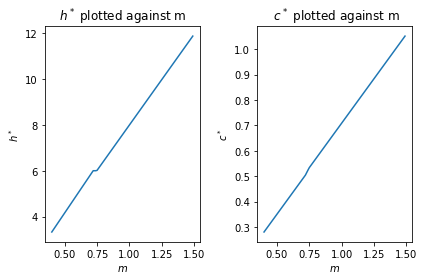

In [34]:
#We plot c* and h* as a function of cash on hand (m), we will therefore run a loop, and for each amount of cash on hand, we will store values of c* and h* respectively in lists
#And then we plot them against m
c_list=[]
h_list=[]
m_list=[]

for m in np.arange(0.4, 1.5, 0.01):
    h_best = solver(m, parameters).x
    c_best = c_func(h_best, m, parameters)
    h_list.append(h_best) 
    c_list.append(c_best)
    m_list.append(m)


    #c and h as a function of m. first h plot(left)
fig = plt.figure()
ax_left = fig.add_subplot(1,2,1)
ax_left.plot(m_list,h_list)
ax_left.set_title('$h^*$ plotted against m')
ax_left.set_xlabel('$m$')
ax_left.set_ylabel('$h^*$')
ax_left.grid(False)

#right plot
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(m_list,c_list)

ax_right.set_title(' $c^*$ plotted against m')
ax_right.set_xlabel('$m$')
ax_right.set_ylabel('$c^*$')
ax_right.grid(False)
plt.tight_layout()

In [38]:
#We could not figure out a way to make average tax burden as a function, but our first thought was to use a random seed, and then running it through a loop, but defining our function 
# was the main problem. Our tries to get it right is posted below

np.random.seed(17)

def tax(h,parameters):
    return parameters['tau_g']*h*paramters['episolon']+paramters['tau_p']*max(h*parameters['epsilon']-paramters['p_bar'],0)

#Here is where we hit a problem we could not figure out a way to get the average tax, our idea was to make a randomly generated value of m in a log normal distribution, but we could not
# find a suitable code to do it with. but if we could get it right, we would have finished with a loop using our solver from earlier and an empty list like earlier, to get the average
#tax burden. Listed below is a try to do it, but gives error

random_m=random.lognormal(0.35,-0.4,10000)

householdtax=[]

for m in random_m:
    h_best=solver(m, parameters).x
    householdtax.append(tax(h_best, parameters))
    
print(f 'average tax burden: {mean(householdtax):,5f}')



SyntaxError: invalid syntax (<ipython-input-38-c5ffed3cd1e4>, line 21)

In [ ]:
#since we could not get a proper answer in 3, its hard to get a proper answer in 4 and 5, therefore i have not listed anything as an attempt.
#But the only thing to do differently in 4, is to change variables and do the same thing again.

#in 5 we would optimize tau_g and make a loop that would optimize tau_g, finding the best possible tau_g and then running question 3 again, getting the new average tax burden.